In [1]:
'''
The objective of this script is to create weekly data of covid cases.
i.e to total no of cases in a county at end of each week.
'''

'\nThe objective of this script is to create weekly data of covid cases.\ni.e to total no of cases in a county at end of each week.\n'

In [27]:

import numpy as np

In [28]:
import json

# Load JSON template
with open("../template.json") as f:
    template = json.load(f)

In [29]:
import pandas as pd
# set up directory
directory = "../us-counties-2022.csv"

#read the csv file using pandas
covid_cases = pd.read_csv(directory)

In [30]:
template

[{'fips': 1001, 'state': 'AL', 'area_name': 'Autauga County', 'cases': 0},
 {'fips': 1003, 'state': 'AL', 'area_name': 'Baldwin County', 'cases': 0},
 {'fips': 1005, 'state': 'AL', 'area_name': 'Barbour County', 'cases': 0},
 {'fips': 1007, 'state': 'AL', 'area_name': 'Bibb County', 'cases': 0},
 {'fips': 1009, 'state': 'AL', 'area_name': 'Blount County', 'cases': 0},
 {'fips': 1011, 'state': 'AL', 'area_name': 'Bullock County', 'cases': 0},
 {'fips': 1013, 'state': 'AL', 'area_name': 'Butler County', 'cases': 0},
 {'fips': 1015, 'state': 'AL', 'area_name': 'Calhoun County', 'cases': 0},
 {'fips': 1017, 'state': 'AL', 'area_name': 'Chambers County', 'cases': 0},
 {'fips': 1019, 'state': 'AL', 'area_name': 'Cherokee County', 'cases': 0},
 {'fips': 1021, 'state': 'AL', 'area_name': 'Chilton County', 'cases': 0},
 {'fips': 1023, 'state': 'AL', 'area_name': 'Choctaw County', 'cases': 0},
 {'fips': 1025, 'state': 'AL', 'area_name': 'Clarke County', 'cases': 0},
 {'fips': 1027, 'state': 'AL'

In [31]:
import glob

f = '../weekly_county2county_2021*.csv'
print(f)
csv_files = glob.glob(f)

../weekly_county2county_2021*.csv


In [32]:
master = {}

In [33]:
prev_week = {}

county_name = []

for template_dict in template:

    county_name.append(template_dict['area_name'])

master["county"]=county_name

In [34]:
prev_month=1
w=0
for filename in csv_files:
    #print(filename)
    date_string = filename.split("_")[2:]
    ds = date_string[-1].split(".")
    date_string[-1]=ds[0]
    if int(date_string[1])==prev_month:
        w=w+1
    else:
        prev=int(date_string[1])
        w=1
    print(int(date_string[1]),"week : ",w)

1 week :  1
1 week :  2
1 week :  3
1 week :  4
2 week :  1
2 week :  1
2 week :  1
2 week :  1
3 week :  1
3 week :  1
3 week :  1
3 week :  1
3 week :  1
4 week :  1
4 week :  1
4 week :  1
4 week :  1
5 week :  1
5 week :  1
5 week :  1
5 week :  1
5 week :  1
6 week :  1
6 week :  1
6 week :  1
6 week :  1
7 week :  1
7 week :  1
7 week :  1
7 week :  1
8 week :  1
8 week :  1
8 week :  1
8 week :  1
8 week :  1
9 week :  1
9 week :  1
9 week :  1
9 week :  1
10 week :  1
10 week :  1
10 week :  1
10 week :  1
11 week :  1
11 week :  1
11 week :  1
11 week :  1
11 week :  1
12 week :  1
12 week :  1
12 week :  1
12 week :  1


In [35]:
directory="../Population_Estimates2021.csv"
population2021 = pd.read_csv(directory)

In [36]:
for i in range(len(population2021)):
    #["Population 2020"]=row["Population 2020"].replace(",","_")
    population2021["Population 2021"][i]=str(population2021["Population 2021"][i]).replace(",","_")
    #row["Population 2020"]=str(row["Population 2020"]).replace(",","_")

c:\users\rkungu2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
population2021

,FIPS,State,Area name,Population 2020,Population 2021
0,0,US,United States,"331,449,281",331_893_745
1,1000,AL,Alabama,"5,024,279",5_039_877
2,1001,AL,Autauga County,"58,805",59_095
3,1003,AL,Baldwin County,"231,767",239_294
4,1005,AL,Barbour County,"25,223",24_964
...,...,...,...,...,...
3190,56037,WY,Sweetwater County,"42,272",41_614
3191,56039,WY,Teton County,"23,331",23_575
3192,56041,WY,Uinta County,"20,450",20_635
3193,56043,WY,Washakie County,"7,685",7_705


In [38]:
end_date

datetime.datetime(2022, 1, 25, 0, 0)

In [39]:
import datetime as dt
# loop through files



i=0

prev_month=1
w=0


for filename in csv_files:
    if filename.endswith(".csv"):
        # extract date information from file name
        i=i+1
        #print(filename)
        date_string = filename.split("_")[2:]
        ds = date_string[-1].split(".")
        date_string[-1]=ds[0]
        #print(date_string)
        file_date = dt.datetime.strptime("_".join(date_string), "%Y_%m_%d")


        # calculate time interval
        end_date = file_date + relativedelta(years=1)
        start_date =  end_date + dt.timedelta(days=-6)
        date_format = "%Y-%m-%d"
        if int(date_string[1])==prev_month:
            w=w+1
            print("yes")
        else:
            prev_month=int(date_string[1])
            w=1
            print("no")
        print(int(date_string[1]),"week : ",w)

        
        # filter covid cases dataframe and sum cases
        interval_cases = covid_cases[(covid_cases["date"] >= str(start_date)) & (covid_cases["date"] < str(end_date))]
        #print(interval_cases)
        
        prev = 0
        data = []
        week = []
        
        week_key = "week" + str(i)
        
        for template_dict in template:

            fips_value = template_dict['fips']
            x = interval_cases[interval_cases["fips"] == fips_value]
            interval_sum = x["cases"].max()
            #print(interval_sum)

            if np.isnan(interval_sum):
                if week_key == "week1":
                    template_dict['cases']=0
                    prev_week[template_dict['area_name']]=0
                else :
                    template_dict['cases']=int(prev_week[template_dict['area_name']])
                    
                    #prev_week[template_dict['area_name']]=0
                            

            else :
                template_dict['cases']=int(interval_sum)
                prev_week[template_dict['area_name']]=interval_sum
            #print(template_dict["fips"])
            #print("cases * 1000",int(template_dict["cases"])*1000)
            if len(population2021[population2021["FIPS"]==template_dict["fips"]]["Population 2021"])==0:
                week.append(0)
            else:
                week.append(int(template_dict["cases"])*1000/int(population2021[population2021["FIPS"]==template_dict["fips"]]["Population 2021"].iloc[0]))
            
        master[week_key]=week
            
                
        print(str(date_string[0])+str(date_string[1])+str(w))
        with open('../Weekly Data/'+str(int(date_string[0])+1)+str(date_string[1])+str(w)+'.json', 'w') as f:
            json.dump(template, f)
                
                #print("sum :",interval_sum)
                #print("prev :",prev)

                #no_of_cases = interval_sum - prev
                #prev = interval_sum
                #data.append(no_of_cases)
                # print results
                #print(f"Cases between {start_date.date()} and {end_date.date()}: {no_of_cases}")
             




yes
1 week :  1
2021011
yes
1 week :  2
2021012
yes
1 week :  3
2021013
yes
1 week :  4
2021014
no
2 week :  1
2021021
yes
2 week :  2
2021022
yes
2 week :  3
2021023
yes
2 week :  4
2021024
no
3 week :  1
2021031
yes
3 week :  2
2021032
yes
3 week :  3
2021033
yes
3 week :  4
2021034
yes
3 week :  5
2021035
no
4 week :  1
2021041
yes
4 week :  2
2021042
yes
4 week :  3
2021043
yes
4 week :  4
2021044
no
5 week :  1
2021051
yes
5 week :  2
2021052
yes
5 week :  3
2021053
yes
5 week :  4
2021054
yes
5 week :  5
2021055
no
6 week :  1
2021061
yes
6 week :  2
2021062
yes
6 week :  3
2021063
yes
6 week :  4
2021064
no
7 week :  1
2021071
yes
7 week :  2
2021072
yes
7 week :  3
2021073
yes
7 week :  4
2021074
no
8 week :  1
2021081
yes
8 week :  2
2021082
yes
8 week :  3
2021083
yes
8 week :  4
2021084
yes
8 week :  5
2021085
no
9 week :  1
2021091
yes
9 week :  2
2021092
yes
9 week :  3
2021093
yes
9 week :  4
2021094
no
10 week :  1
2021101
yes
10 week :  2
2021102
yes
10 week :  3
202110

In [40]:
master

{'county': ['Autauga County',
  'Baldwin County',
  'Barbour County',
  'Bibb County',
  'Blount County',
  'Bullock County',
  'Butler County',
  'Calhoun County',
  'Chambers County',
  'Cherokee County',
  'Chilton County',
  'Choctaw County',
  'Clarke County',
  'Clay County',
  'Cleburne County',
  'Coffee County',
  'Colbert County',
  'Conecuh County',
  'Coosa County',
  'Covington County',
  'Crenshaw County',
  'Cullman County',
  'Dale County',
  'Dallas County',
  'DeKalb County',
  'Elmore County',
  'Escambia County',
  'Etowah County',
  'Fayette County',
  'Franklin County',
  'Geneva County',
  'Greene County',
  'Hale County',
  'Henry County',
  'Houston County',
  'Jackson County',
  'Jefferson County',
  'Lamar County',
  'Lauderdale County',
  'Lawrence County',
  'Lee County',
  'Limestone County',
  'Lowndes County',
  'Macon County',
  'Madison County',
  'Marengo County',
  'Marion County',
  'Marshall County',
  'Mobile County',
  'Monroe County',
  'Montgom

In [41]:
prev_week

{'Autauga County': 18961,
 'Baldwin County': 10936,
 'Barbour County': 5837,
 'Bibb County': 43891,
 'Blount County': 47176,
 'Bullock County': 2886,
 'Butler County': 53570,
 'Calhoun County': 2248,
 'Chambers County': 12279,
 'Cherokee County': 9414,
 'Chilton County': 12596,
 'Choctaw County': 4882,
 'Clarke County': 3372,
 'Clay County': 2669,
 'Cleburne County': 7832,
 'Coffee County': 20169,
 'Colbert County': 20165,
 'Conecuh County': 3410,
 'Coosa County': 3643,
 'Covington County': 8312,
 'Crenshaw County': 4516,
 'Cullman County': 30119,
 'Dale County': 15789,
 'Dallas County': 675403,
 'DeKalb County': 7402,
 'Elmore County': 8833,
 'Escambia County': 91615,
 'Etowah County': 33129,
 'Fayette County': 16275,
 'Franklin County': 36391,
 'Geneva County': 7591,
 'Greene County': 4899,
 'Hale County': 8148,
 'Henry County': 15453,
 'Houston County': 4862,
 'Jackson County': 6741,
 'Jefferson County': 26221,
 'Lamar County': 14913,
 'Lauderdale County': 9038,
 'Lawrence County': 

In [42]:
master_df = pd.DataFrame(master)

In [43]:
master_df

,county,week1,week2,week3,week4,week5,week6,week7,week8,week9,...,week43,week44,week45,week46,week47,week48,week49,week50,week51,week52
0,Autauga County,192.012861,204.788899,215.551231,224.232169,250.139606,255.334631,259.751248,261.308063,262.627972,...,312.716812,313.241391,313.241391,314.256705,314.612065,314.950503,316.101193,317.319570,318.927151,320.856248
1,Baldwin County,170.660359,183.439618,197.008701,210.256003,220.987572,225.630396,227.941361,229.027890,229.788461,...,275.372554,275.698513,275.698513,276.701463,276.931306,277.817246,278.861986,279.785536,280.913855,282.063069
2,Barbour County,160.190675,175.252363,189.913475,202.451530,211.344336,215.189873,216.832238,217.513219,218.114084,...,277.439513,277.599744,277.599744,278.400897,278.761416,279.121936,279.602628,279.963147,280.684185,281.485339
3,Bibb County,205.365485,222.761045,239.578236,257.819104,272.723228,277.795079,281.665703,282.955910,283.623259,...,336.343818,337.011167,337.011167,338.301375,338.657294,339.324643,339.769542,340.481381,341.148730,342.216488
4,Blount County,193.594282,202.655782,214.224014,227.418235,238.749344,244.186243,246.862350,248.776274,250.199014,...,292.779594,293.355465,293.355465,294.473332,294.930641,295.726698,296.404194,297.403499,298.910926,300.316729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater County,201.566780,207.334070,218.243860,233.382996,248.281828,256.764550,261.955111,263.444994,264.406209,...,292.738021,292.978325,293.434902,293.771327,294.684481,295.669727,296.751093,297.351853,297.832460,298.216946
3138,Teton County,273.679745,319.533404,361.866384,383.838812,396.309650,403.054083,408.101803,412.852598,415.312831,...,501.124072,501.972428,502.693531,503.372216,504.262990,505.238600,506.765642,507.656416,508.886532,509.437964
3139,Uinta County,203.101527,211.630724,225.829901,246.232130,260.625151,268.427429,270.608190,271.916646,272.692028,...,299.781924,300.314999,300.944996,301.478071,302.350376,303.125757,303.949600,304.676520,305.451902,305.548825
3140,Washakie County,245.425049,251.395198,258.663206,268.007787,284.620376,290.460740,296.950032,301.362751,303.569111,...,346.658014,346.787800,347.826087,347.826087,347.047372,347.826087,350.421804,352.498378,352.498378,353.147307


In [156]:
!pip install -U scikit-learn scipy 

     ---------------------------------------- 7.1/7.1 MB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 34.1/34.1 MB 7.8 MB/s eta 0:00:00
     ------------------------------------- 298.0/298.0 kB 18.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 50))

for i in range(1,53):
    master_df['week'+str(i)] = scaler.fit_transform(master_df[['week'+str(i)]])

In [45]:
master_df

,county,week1,week2,week3,week4,week5,week6,week7,week8,week9,...,week43,week44,week45,week46,week47,week48,week49,week50,week51,week52
0,Autauga County,13.725173,10.808303,8.190947,6.871631,5.703183,5.018646,4.807085,4.597086,4.563962,...,2.553705,2.550680,2.550680,2.558947,2.561841,2.557290,2.552092,2.547495,2.517846,2.512199
1,Baldwin County,12.198886,9.681535,7.486331,6.443329,5.038517,4.434804,4.218395,4.029194,3.993275,...,2.248744,2.244974,2.244974,2.253140,2.255012,2.255781,2.251435,2.246166,2.217741,2.208461
2,Barbour County,11.450507,9.249430,7.216712,6.204160,4.818651,4.229594,4.012804,3.826621,3.790397,...,2.265624,2.260455,2.260455,2.266979,2.269914,2.266375,2.257415,2.247591,2.215928,2.203937
3,Bibb County,14.679625,11.756833,9.103973,7.900908,6.218090,5.460110,5.212644,4.977928,4.928819,...,2.746647,2.744234,2.744234,2.754740,2.757638,2.755200,2.743182,2.733442,2.693279,2.679442
4,Blount County,13.838213,10.695722,8.140513,6.969268,5.443485,4.799523,4.568556,4.376620,4.347971,...,2.390894,2.388752,2.388752,2.397854,2.401578,2.401200,2.393065,2.387606,2.359823,2.351381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater County,14.408092,10.942631,8.293267,7.152060,5.660826,5.046752,4.847871,4.634680,4.594864,...,2.390554,2.385681,2.389398,2.392138,2.399574,2.400737,2.395866,2.387191,2.351309,2.334940
3138,Teton County,19.562761,16.864263,13.750923,11.762802,9.035860,7.922097,7.552533,7.263148,7.217327,...,4.092274,4.087490,4.093362,4.098888,4.106141,4.102365,4.091451,4.075552,4.017525,3.988731
3139,Uinta County,14.517796,11.169399,8.581536,7.545823,5.942253,5.275987,5.008009,4.783719,4.738855,...,2.448076,2.445422,2.450552,2.454893,2.461996,2.461278,2.453984,2.445995,2.411462,2.392347
3140,Washakie County,17.543102,13.268080,9.829202,8.213142,6.489345,5.709056,5.495504,5.301752,5.275439,...,2.830875,2.823844,2.832298,2.832298,2.825957,2.824229,2.829185,2.829917,2.782882,2.765027


In [46]:
import json

# Load JSON template
with open("../template.json") as f:
    template = json.load(f)

In [47]:
master_df["county"]

0          Autauga County
1          Baldwin County
2          Barbour County
3             Bibb County
4           Blount County
              ...        
3137    Sweetwater County
3138         Teton County
3139         Uinta County
3140      Washakie County
3141        Weston County
Name: county, Length: 3142, dtype: object

In [48]:
master_df["week1"][20]

15.423787648815148

In [29]:
import matplotlib.pyplot as plt

In [30]:
distribution = master_df['week52'].describe()

# print the distribution
print(distribution)

count    3142.000000
mean       12.287022
std         2.941940
min         0.000000
25%        10.696998
50%        12.448677
75%        13.937992
max        50.000000
Name: week52, dtype: float64


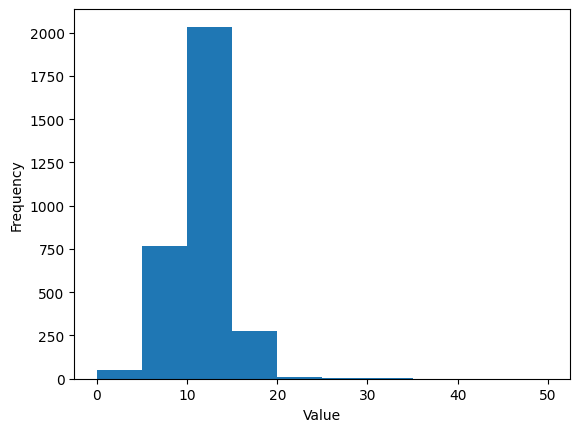

In [31]:
plt.hist(master_df['week45'])

# add x and y labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# show the plot
plt.show()

In [49]:
i=0

prev_month=1
w=0


for filename in csv_files:
    if filename.endswith(".csv"):
        # extract date information from file name
        i=i+1
        #print(filename)
        date_string = filename.split("_")[2:]
        ds = date_string[-1].split(".")
        date_string[-1]=ds[0]
        print(date_string)
        file_date = dt.datetime.strptime("_".join(date_string), "%Y_%m_%d")


        # calculate time interval
        end_date = file_date + relativedelta(years=1)
        start_date =  end_date + dt.timedelta(days=-6)
        date_format = "%Y-%m-%d"
        if int(date_string[1])==prev_month:
            w=w+1
            print("yes")
        else:
            prev_month=int(date_string[1])
            w=1
            print("no")
        print(int(date_string[1]),"week : ",w)

        master_week=master_df["week"+str(i)]
        j=0
        for temp_dict in template:
            temp_dict["cases"]=master_week[j]
            j=j+1
        with open('../scaled_data/'+str(int(date_string[0])+1)+str(date_string[1])+str(w)+'.json', 'w') as f:
            json.dump(template, f)


['2021', '01', '04']
yes
1 week :  1
['2021', '01', '11']
yes
1 week :  2
['2021', '01', '18']
yes
1 week :  3
['2021', '01', '25']
yes
1 week :  4
['2021', '02', '01']
no
2 week :  1
['2021', '02', '08']
yes
2 week :  2
['2021', '02', '15']
yes
2 week :  3
['2021', '02', '22']
yes
2 week :  4
['2021', '03', '01']
no
3 week :  1
['2021', '03', '08']
yes
3 week :  2
['2021', '03', '15']
yes
3 week :  3
['2021', '03', '22']
yes
3 week :  4
['2021', '03', '29']
yes
3 week :  5
['2021', '04', '05']
no
4 week :  1
['2021', '04', '12']
yes
4 week :  2
['2021', '04', '19']
yes
4 week :  3
['2021', '04', '26']
yes
4 week :  4
['2021', '05', '03']
no
5 week :  1
['2021', '05', '10']
yes
5 week :  2
['2021', '05', '17']
yes
5 week :  3
['2021', '05', '24']
yes
5 week :  4
['2021', '05', '31']
yes
5 week :  5
['2021', '06', '07']
no
6 week :  1
['2021', '06', '14']
yes
6 week :  2
['2021', '06', '21']
yes
6 week :  3
['2021', '06', '28']
yes
6 week :  4
['2021', '07', '05']
no
7 week :  1
['2021'

In [33]:
template

[{'fips': 1001,
  'state': 'AL',
  'area_name': 'Autauga County',
  'cases': 13.157077667721959},
 {'fips': 1003,
  'state': 'AL',
  'area_name': 'Baldwin County',
  'cases': 11.71582464918803},
 {'fips': 1005,
  'state': 'AL',
  'area_name': 'Barbour County',
  'cases': 10.791356230247175},
 {'fips': 1007,
  'state': 'AL',
  'area_name': 'Bibb County',
  'cases': 14.176188647695229},
 {'fips': 1009,
  'state': 'AL',
  'area_name': 'Blount County',
  'cases': 13.500777885138907},
 {'fips': 1011,
  'state': 'AL',
  'area_name': 'Bullock County',
  'cases': 10.910470297396117},
 {'fips': 1013,
  'state': 'AL',
  'area_name': 'Butler County',
  'cases': 13.419461590081074},
 {'fips': 1015,
  'state': 'AL',
  'area_name': 'Calhoun County',
  'cases': 14.250479872849748},
 {'fips': 1017,
  'state': 'AL',
  'area_name': 'Chambers County',
  'cases': 12.44093703456059},
 {'fips': 1019,
  'state': 'AL',
  'area_name': 'Cherokee County',
  'cases': 9.51315291286835},
 {'fips': 1021,
  'state': 

In [34]:
for i in range(1,53):
    print(master_df['week'+str(i)].min(), "   ", master_df['week'+str(i)].max())

0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     49.99999999999999
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     50.0
0.0     49.99999999999999


In [47]:
directory="../Population_Estimates2021.csv"
population2021 = pd.read_csv(directory)

In [54]:
for i in range(len(population2021)):
    #["Population 2020"]=row["Population 2020"].replace(",","_")
    population2021["Population 2021"][i]=str(population2021["Population 2021"][i]).replace(",","_")
    #row["Population 2020"]=str(row["Population 2020"]).replace(",","_")

c:\users\rkungu2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
for index,rows in population2021.iterrows():
    if int(rows["FIPS"])%1000==0:
        print(rows["Population 2020"])

331_449_281
5_024_279
733_391
7_151_502
3_011_524
39_538_223
5_773_714
3_605_944
989_948
689_545
21_538_187
10_711_908
1_455_271
1_839_106
12_812_508
6_785_528
3_190_369
2_937_880
4_505_836
4_657_757
1_362_359
6_177_224
7_029_917
10_077_331
5_706_494
2_961_279
6_154_913
1_084_225
1_961_504
3_104_614
1_377_529
9_288_994
2_117_522
20_201_249
10_439_388
779_094
11_799_448
3_959_353
4_237_256
13_002_700
1_097_379
5_118_425
886_667
6_910_840
29_145_505
3_271_616
643_077
8_631_393
7_705_281
1_793_716
5_893_718
576_851
